# CLEAN LEATHER

## baseline

In [5]:
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from utils.results import *
import torch

from PIL import Image
import math

 load experimetns from the original paper seed as baseline , with the scores max() from train and test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   guide_paths     461 non-null    object 
 1   markers         461 non-null    object 
 2   anocolor        461 non-null    object 
 3   anocolor_clean  461 non-null    object 
 4   set             461 non-null    object 
 5   clean_1         461 non-null    float64
dtypes: float64(1), object(5)
memory usage: 21.7+ KB


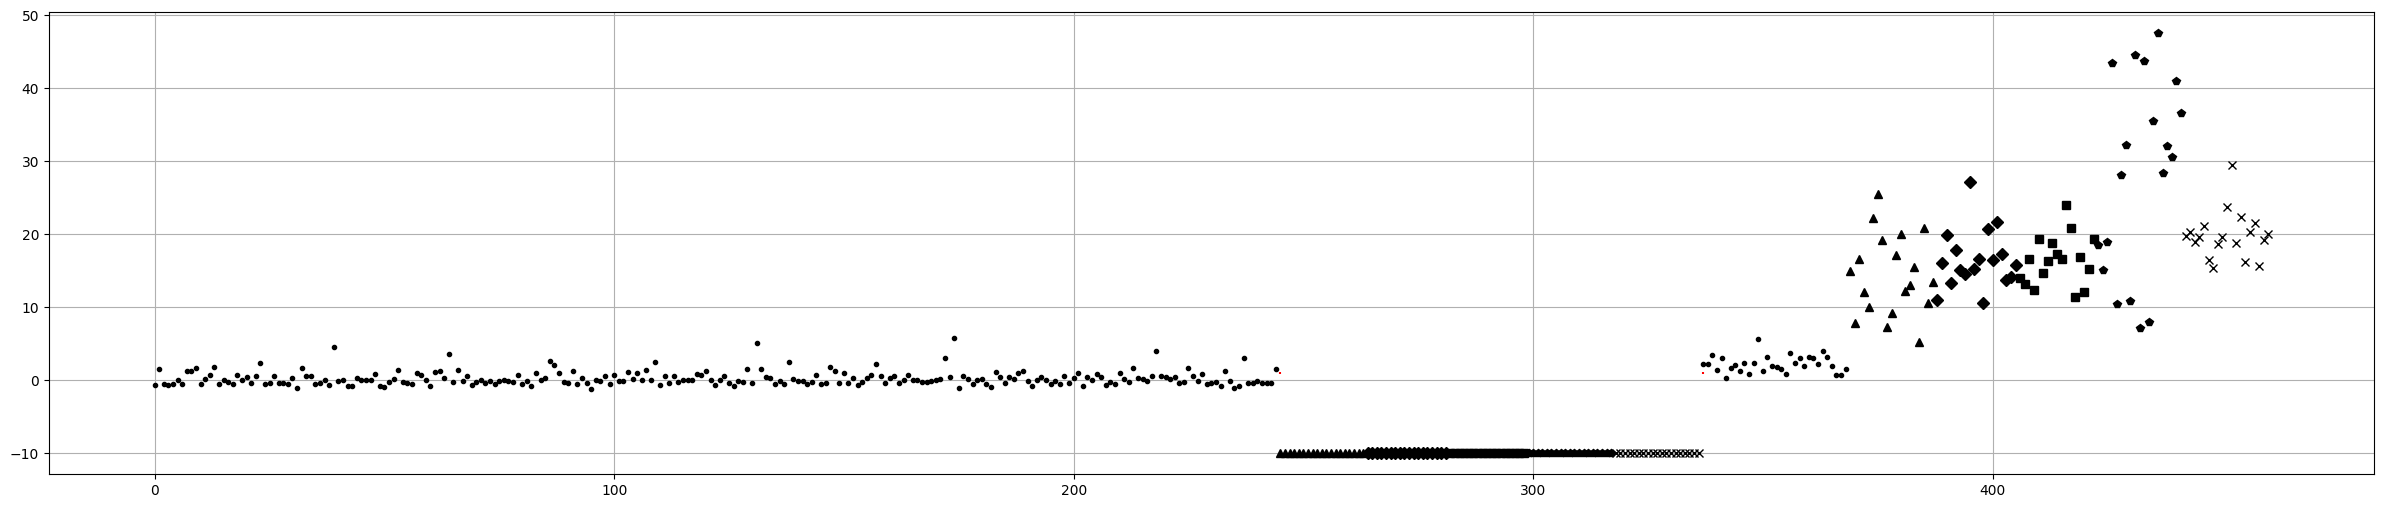

In [6]:

category='leather'
experiment_path=f'/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-{category}'




with open(experiment_path + "/all_trainscores.pkl", "rb") as file:
    guide_trainscores = pickle.load(file)
with open(experiment_path + "/all_testscores.pkl", "rb") as file:
    guide_testscores = pickle.load(file)
with open(experiment_path + "/experiment_paths.json", 'r') as file:
    exppath_guide = json.load(file)   


exppath_guide_contam_paths= [path  for path in exppath_guide['test'] if 'good' not in path]

guide_allpaths=exppath_guide['train']+ exppath_guide_contam_paths+ exppath_guide['test']

guide_allscores=guide_trainscores.tolist()+[-1]*len(exppath_guide_contam_paths)+ guide_testscores.tolist()
set=['train']*len(guide_trainscores)+['train']*len(exppath_guide_contam_paths)+['test']*len(guide_testscores)

# ####################################################################################################
#guide allscores normalized

training_median=torch.median(guide_trainscores)
training_std=torch.std(guide_trainscores)


sorted_trainscores=[((score-training_median)/training_std).item() for score in guide_trainscores.tolist()]
sorted_testscores=[((score-training_median)/training_std).item() for score in guide_testscores.tolist()]
guide_allscores=sorted_trainscores+[-10]*len(exppath_guide_contam_paths)+ sorted_testscores

#####################################################################################################

anotype_marker={'good':'.','manipulated_front':'x','scratch_head':'^','scratch_neck':'s','thread_side':'p','thread_top':'D'}
anocolor={'good':'blue','manipulated_front':'green','scratch_head':'red','scratch_neck':'dodgerblue','thread_side':'purple','thread_top':'olive'}
anocolor_clean={'good':'skyblue','manipulated_front':'lightgreen','scratch_head':'orchid','scratch_neck':'aquamarine','thread_side':'mediumpurple','thread_top':'lime'}

anotype_marker, anocolor, anocolor_clean = get_anomaly_dictionaries(category)

anotype=['good']*len(guide_allscores)
for key in anotype_marker.keys():
    anotype=[key if key in path else anotype[i] for i,path in enumerate(guide_allpaths)]
color=[anocolor[key] for key in anotype]
color_clean=[anocolor_clean[key] for key in anotype]

marker=[anotype_marker[key] for key in anotype]  
df=pd.DataFrame({'guide_paths':guide_allpaths,"markers":marker,'anocolor':color,'anocolor_clean':color_clean,'set':set,'clean_1':guide_allscores})


plt.figure(figsize=(30, 6))
for i in range(len(df)):
    plt.plot(df.index[i], df['clean_1'][i],  color='black', marker=df['markers'][i])

#plt.ylim(0.8,1.15)
plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
plt.vlines(len(guide_trainscores)+len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
plt.grid(True)


df.info()

#### clean full


add 10 runs with different random components to it

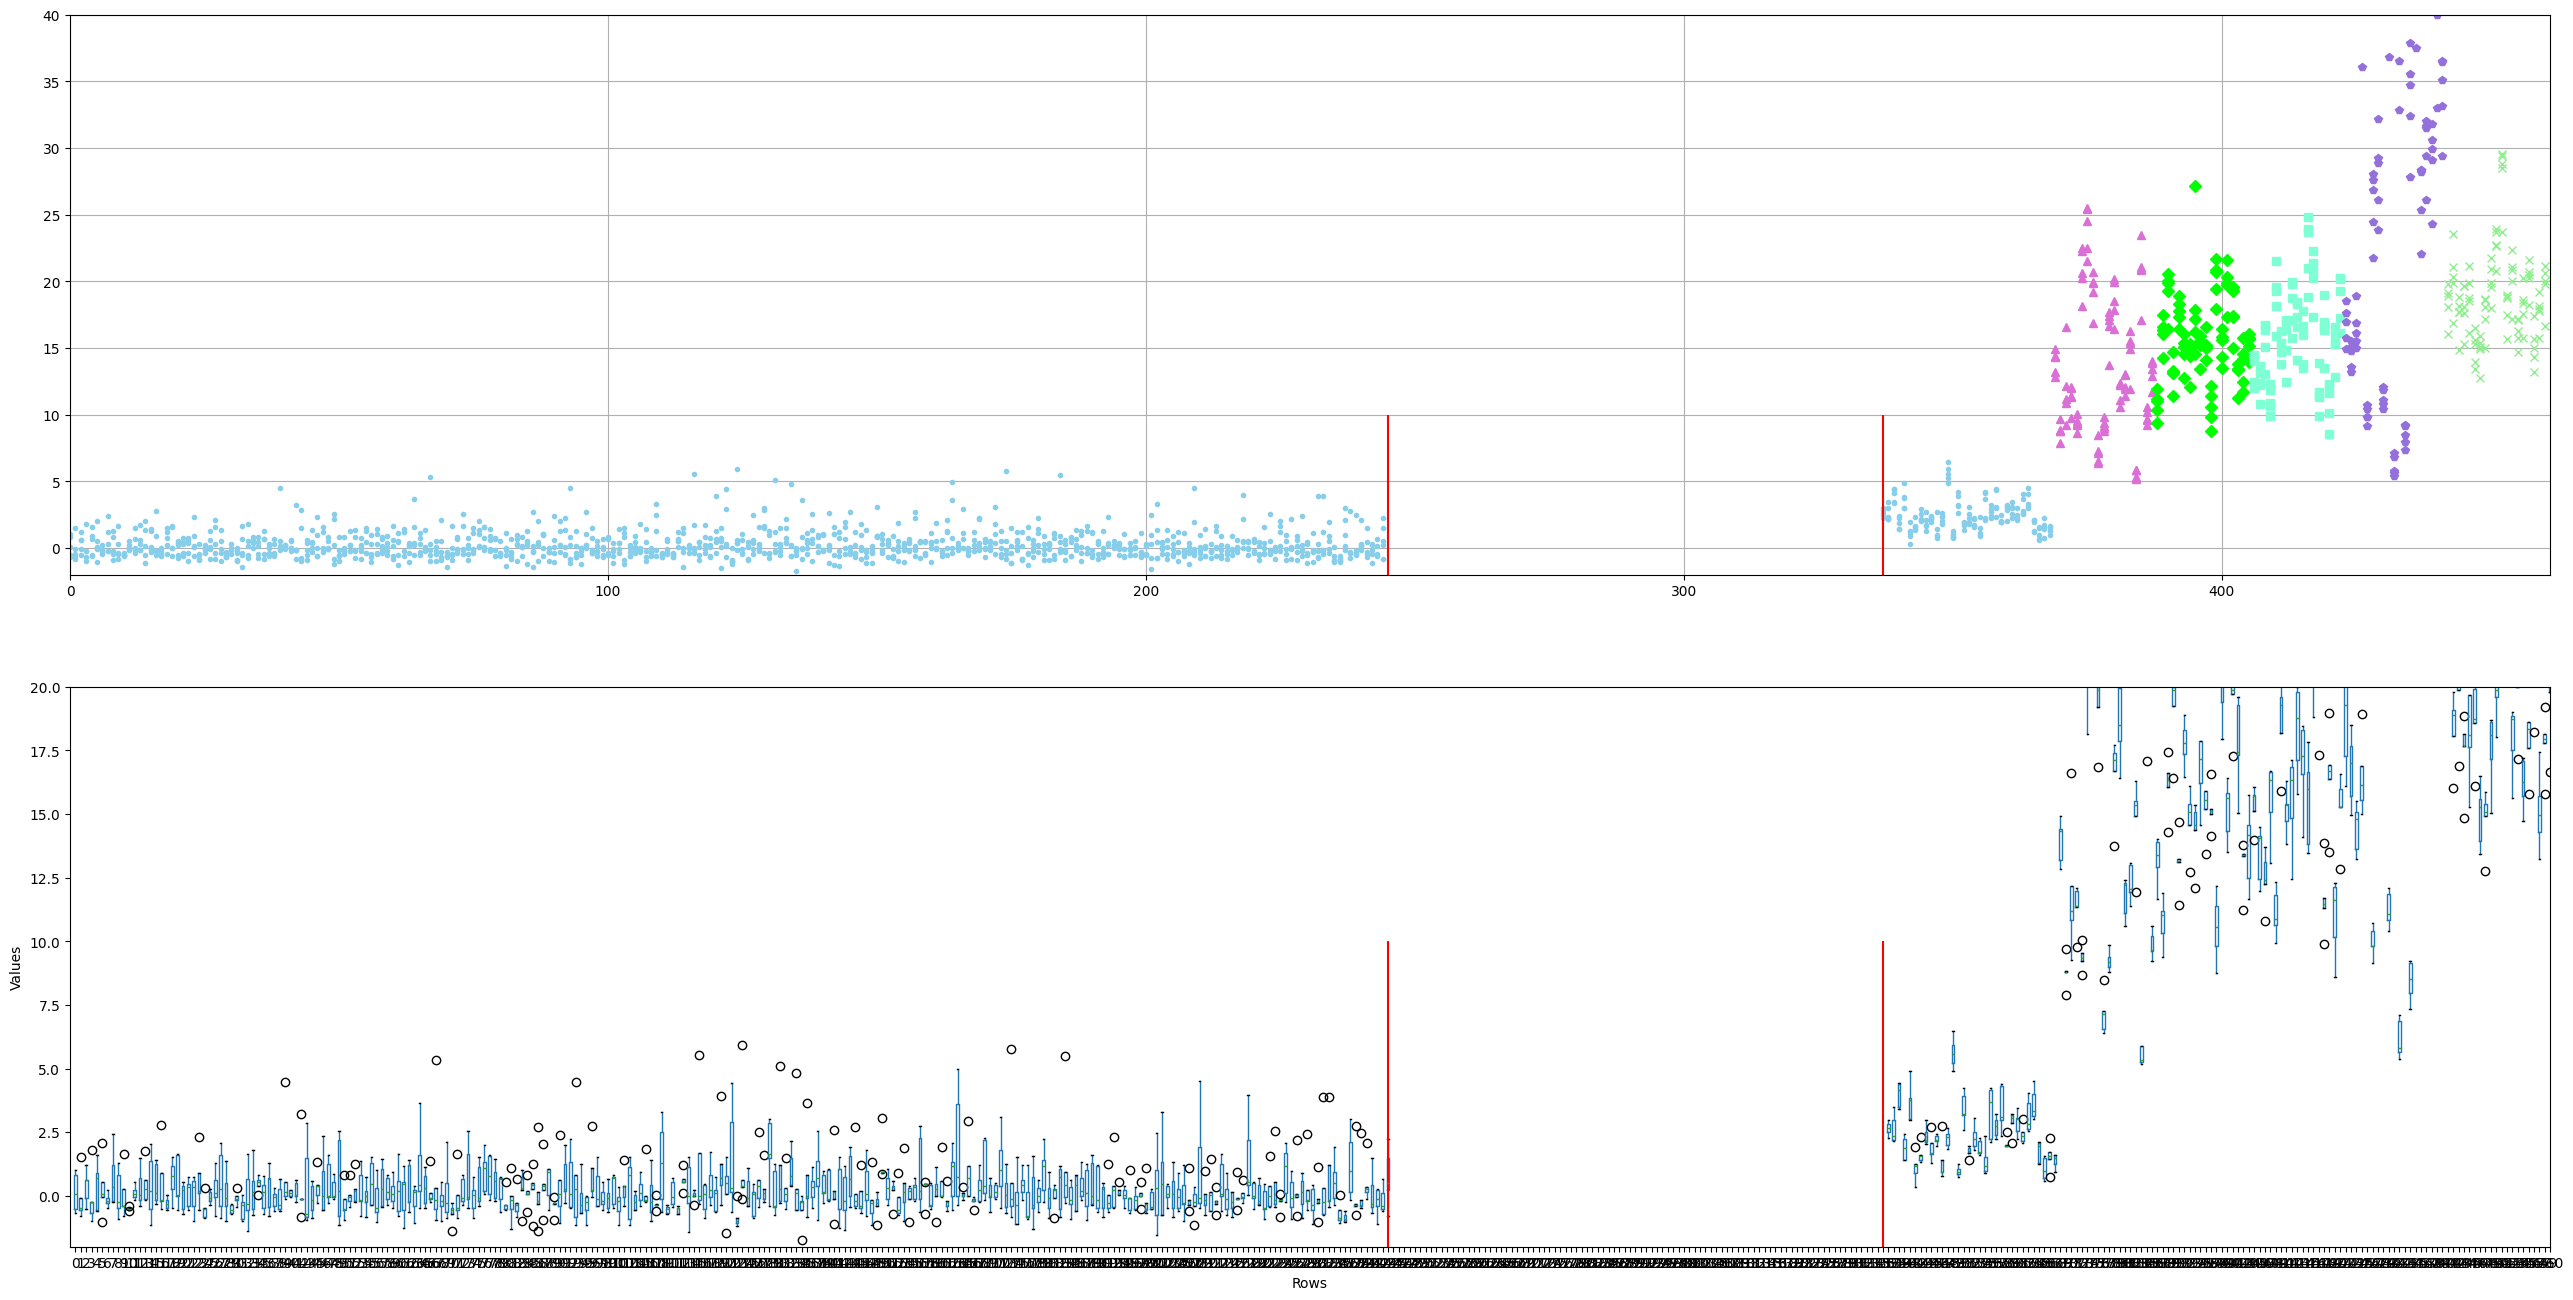

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   guide_paths     461 non-null    object 
 1   markers         461 non-null    object 
 2   anocolor        461 non-null    object 
 3   anocolor_clean  461 non-null    object 
 4   set             461 non-null    object 
 5   clean_1         461 non-null    float64
 6   clean_2         461 non-null    float64
 7   clean_3         461 non-null    float64
 8   clean_4         461 non-null    float64
 9   clean_5         461 non-null    float64
dtypes: float64(5), object(5)
memory usage: 36.1+ KB


In [7]:
filepaths=[f'/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-{category}',
           f'/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-{category}',
           f'/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-{category}',
           f'/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-{category}']


for i,path in enumerate(filepaths):
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    sorted_train_idx=[exppath_guide['train'].index(path) for path in exppath['train']]
    sorted_test_idx=[exppath_guide['test'].index(path) for path in exppath['test']]
    sorted_trainscores=[trainscores[i] for i in sorted_train_idx]
    sorted_testscores=[testscores[i] for i in sorted_test_idx]
    allscores=sorted_trainscores+[-10]*len(exppath_guide_contam_paths)+ sorted_testscores
    
    ##########################################
    # # standarize
    training_median=np.median(sorted_trainscores)
    training_std=np.std(sorted_trainscores)
    
    sorted_trainscores=[(score-training_median)/training_std for score in sorted_trainscores]
    sorted_testscores=[(score-training_median)/training_std for score in sorted_testscores]
    allscores=sorted_trainscores+[-10]*len(exppath_guide_contam_paths)+ sorted_testscores
    ############################################
    
    df[f'clean_{i+2}']=allscores
    
   
    
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(32, 16))

# First subplot: Plotting data points
for i in range(len(df)):
    ax1.plot(df.index[i], df['clean_1'][i],   marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_2'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_3'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_4'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_5'][i], marker=df['markers'][i],color=df['anocolor_clean'][i])
    
ax1.set_ylim(-2, 40)
ax1.set_xlim(0, len(df))
ax1.vlines(len(guide_trainscores), -5, 10, color='red')
ax1.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), -5, 10, color='red')
ax1.grid(True)

df_transposed = df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].T
df_transposed.boxplot(ax=ax2)
ax2.set_ylim(-2, 20)
ax2.set_xlim(0, len(df))
ax2.vlines(len(guide_trainscores), -5, 10, color='red')
ax2.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), -5, 10, color='red')
ax2.set_xlabel('Rows')
ax2.set_ylabel('Values')
ax2.grid(False)

plt.show()

df.info()

statistics on the training runs clean

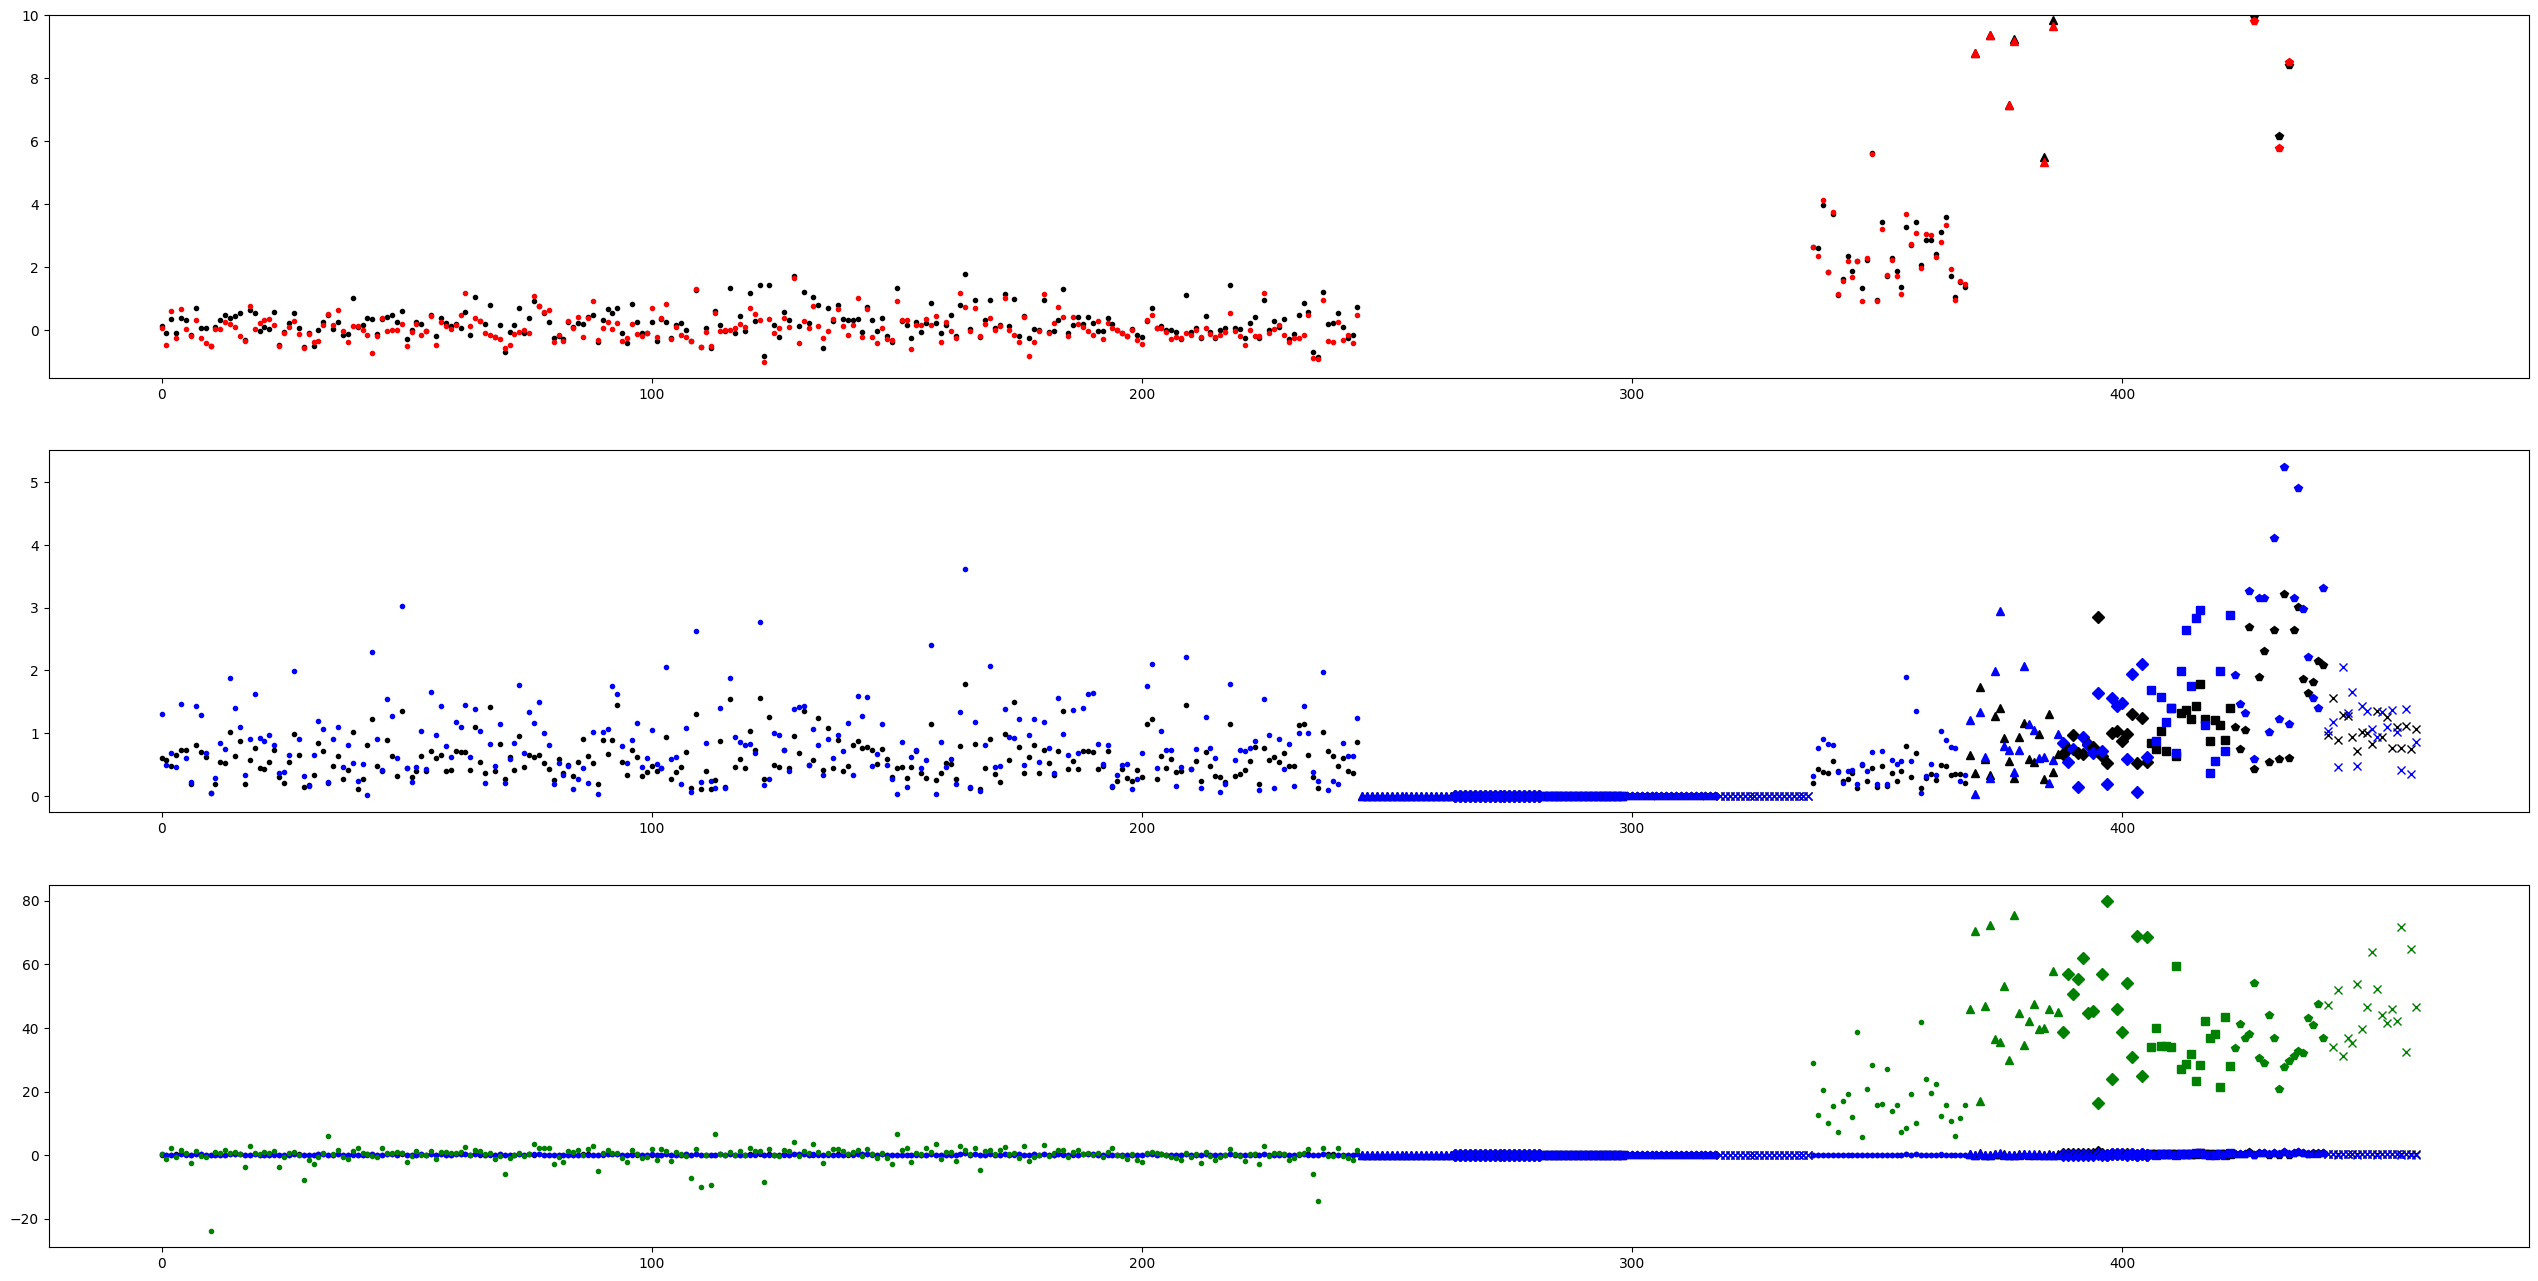

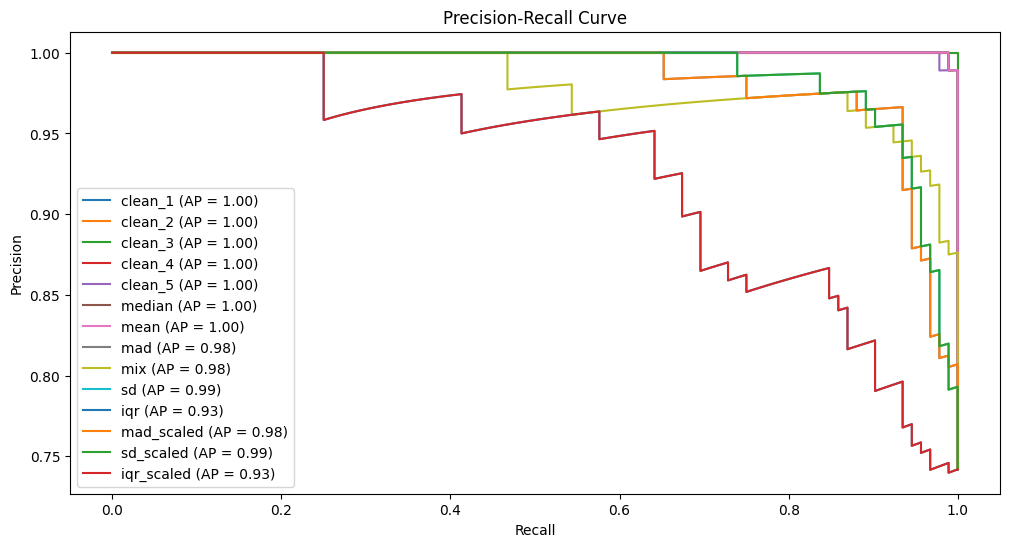

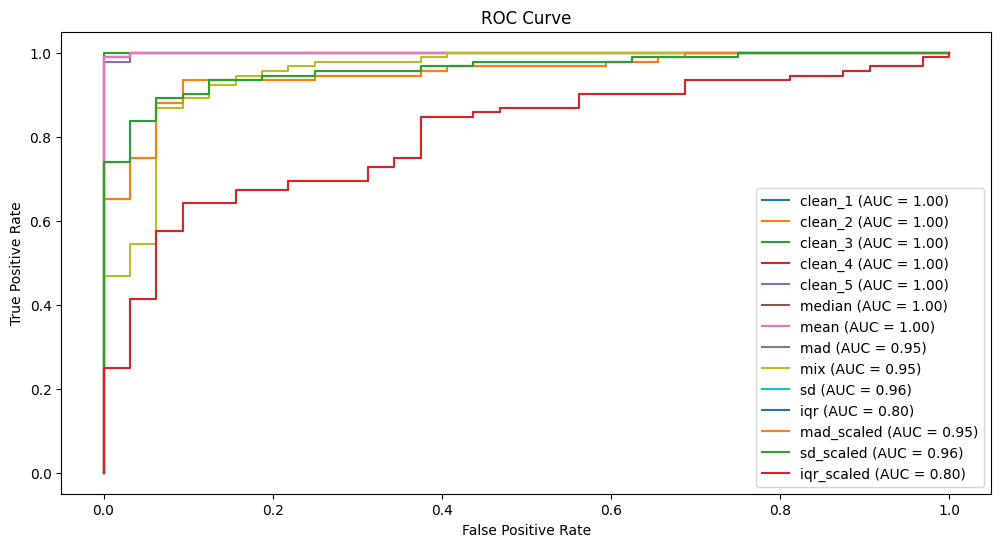

In [8]:
def IQR(row):
    q1 = np.percentile(row, 25)
    q3 = np.percentile(row, 75)
    IQR = q3 - q1
    return IQR
def MAD(row):
    median = np.median(row)
    mad = np.mean(np.abs(row - median))
    return mad

# location
df['mean']=df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].mean(axis=1)
df['median']=df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].median(axis=1)
# scale
df['mad'] = df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].apply(MAD,axis=1)
df['sd']=df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].std(axis=1)
df['iqr'] = df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].apply(IQR, axis=1)

# normalize scores to 0 .. 1
df['mad_scaled']=(df['mad']-df['mad'].min())/(df['mad'].max()-df['mad'].min())
df['sd_scaled']=(df['sd']-df['sd'].min())/(df['sd'].max()-df['sd'].min())
df['iqr_scaled']=(df['iqr']-df['iqr'].min())/(df['iqr'].max()-df['iqr'].min())

# some mixed score from mean and median
df['mix']=(df['mean']+df['median'] )/ (df['mad_scaled']+df['sd_scaled']+df['iqr_scaled'])

# Creating subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(32, 16))
ax1.set_ylim(-1.5, 10)
# First subplot: Plotting data points
for i in range(len(df)):
    ax1.plot(df.index[i], df['mean'][i],   marker=df['markers'][i],color='black')
    ax1.plot(df.index[i], df['median'][i],   marker=df['markers'][i],color='red')
    
    ax2.plot(df.index[i], df['mad'][i],   marker=df['markers'][i],color='black')
    #ax2.plot(df.index[i], df['sd'][i],   marker=df['markers'][i],color='red')
    ax2.plot(df.index[i], df['iqr'][i],   marker=df['markers'][i],color='blue')
    
    ax3.plot(df.index[i], df['mad_scaled'][i],   marker=df['markers'][i],color='black')
    #ax3.plot(df.index[i], df['sd_scaled'][i],   marker=df['markers'][i],color='red')
    ax3.plot(df.index[i], df['iqr_scaled'][i],   marker=df['markers'][i],color='blue')
    ax3.plot(df.index[i], df['mix'][i],   marker=df['markers'][i],color='green')



test_labs = [0 if 'good' in path else 1 for path in exppath_guide['test']]
score_columns = ['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5','median','mean','mad','mix','sd','iqr','mad_scaled','sd_scaled','iqr_scaled']

# Initialize the plot for Precision-Recall curves
plt.figure(figsize=(12, 6))

for col in score_columns:
    # Extract the scores for the current column
    scores = df[col][df['set'] == 'test']

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(test_labs, scores)
    average_precision = average_precision_score(test_labs, scores)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{col} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Initialize the plot for ROC curves
plt.figure(figsize=(12, 6))

for col in score_columns:
    # Extract the scores for the current column
    scores = df[col][df['set'] == 'test']

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(test_labs, scores)
    roc_auc = roc_auc_score(test_labs, scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{col} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### hraysca

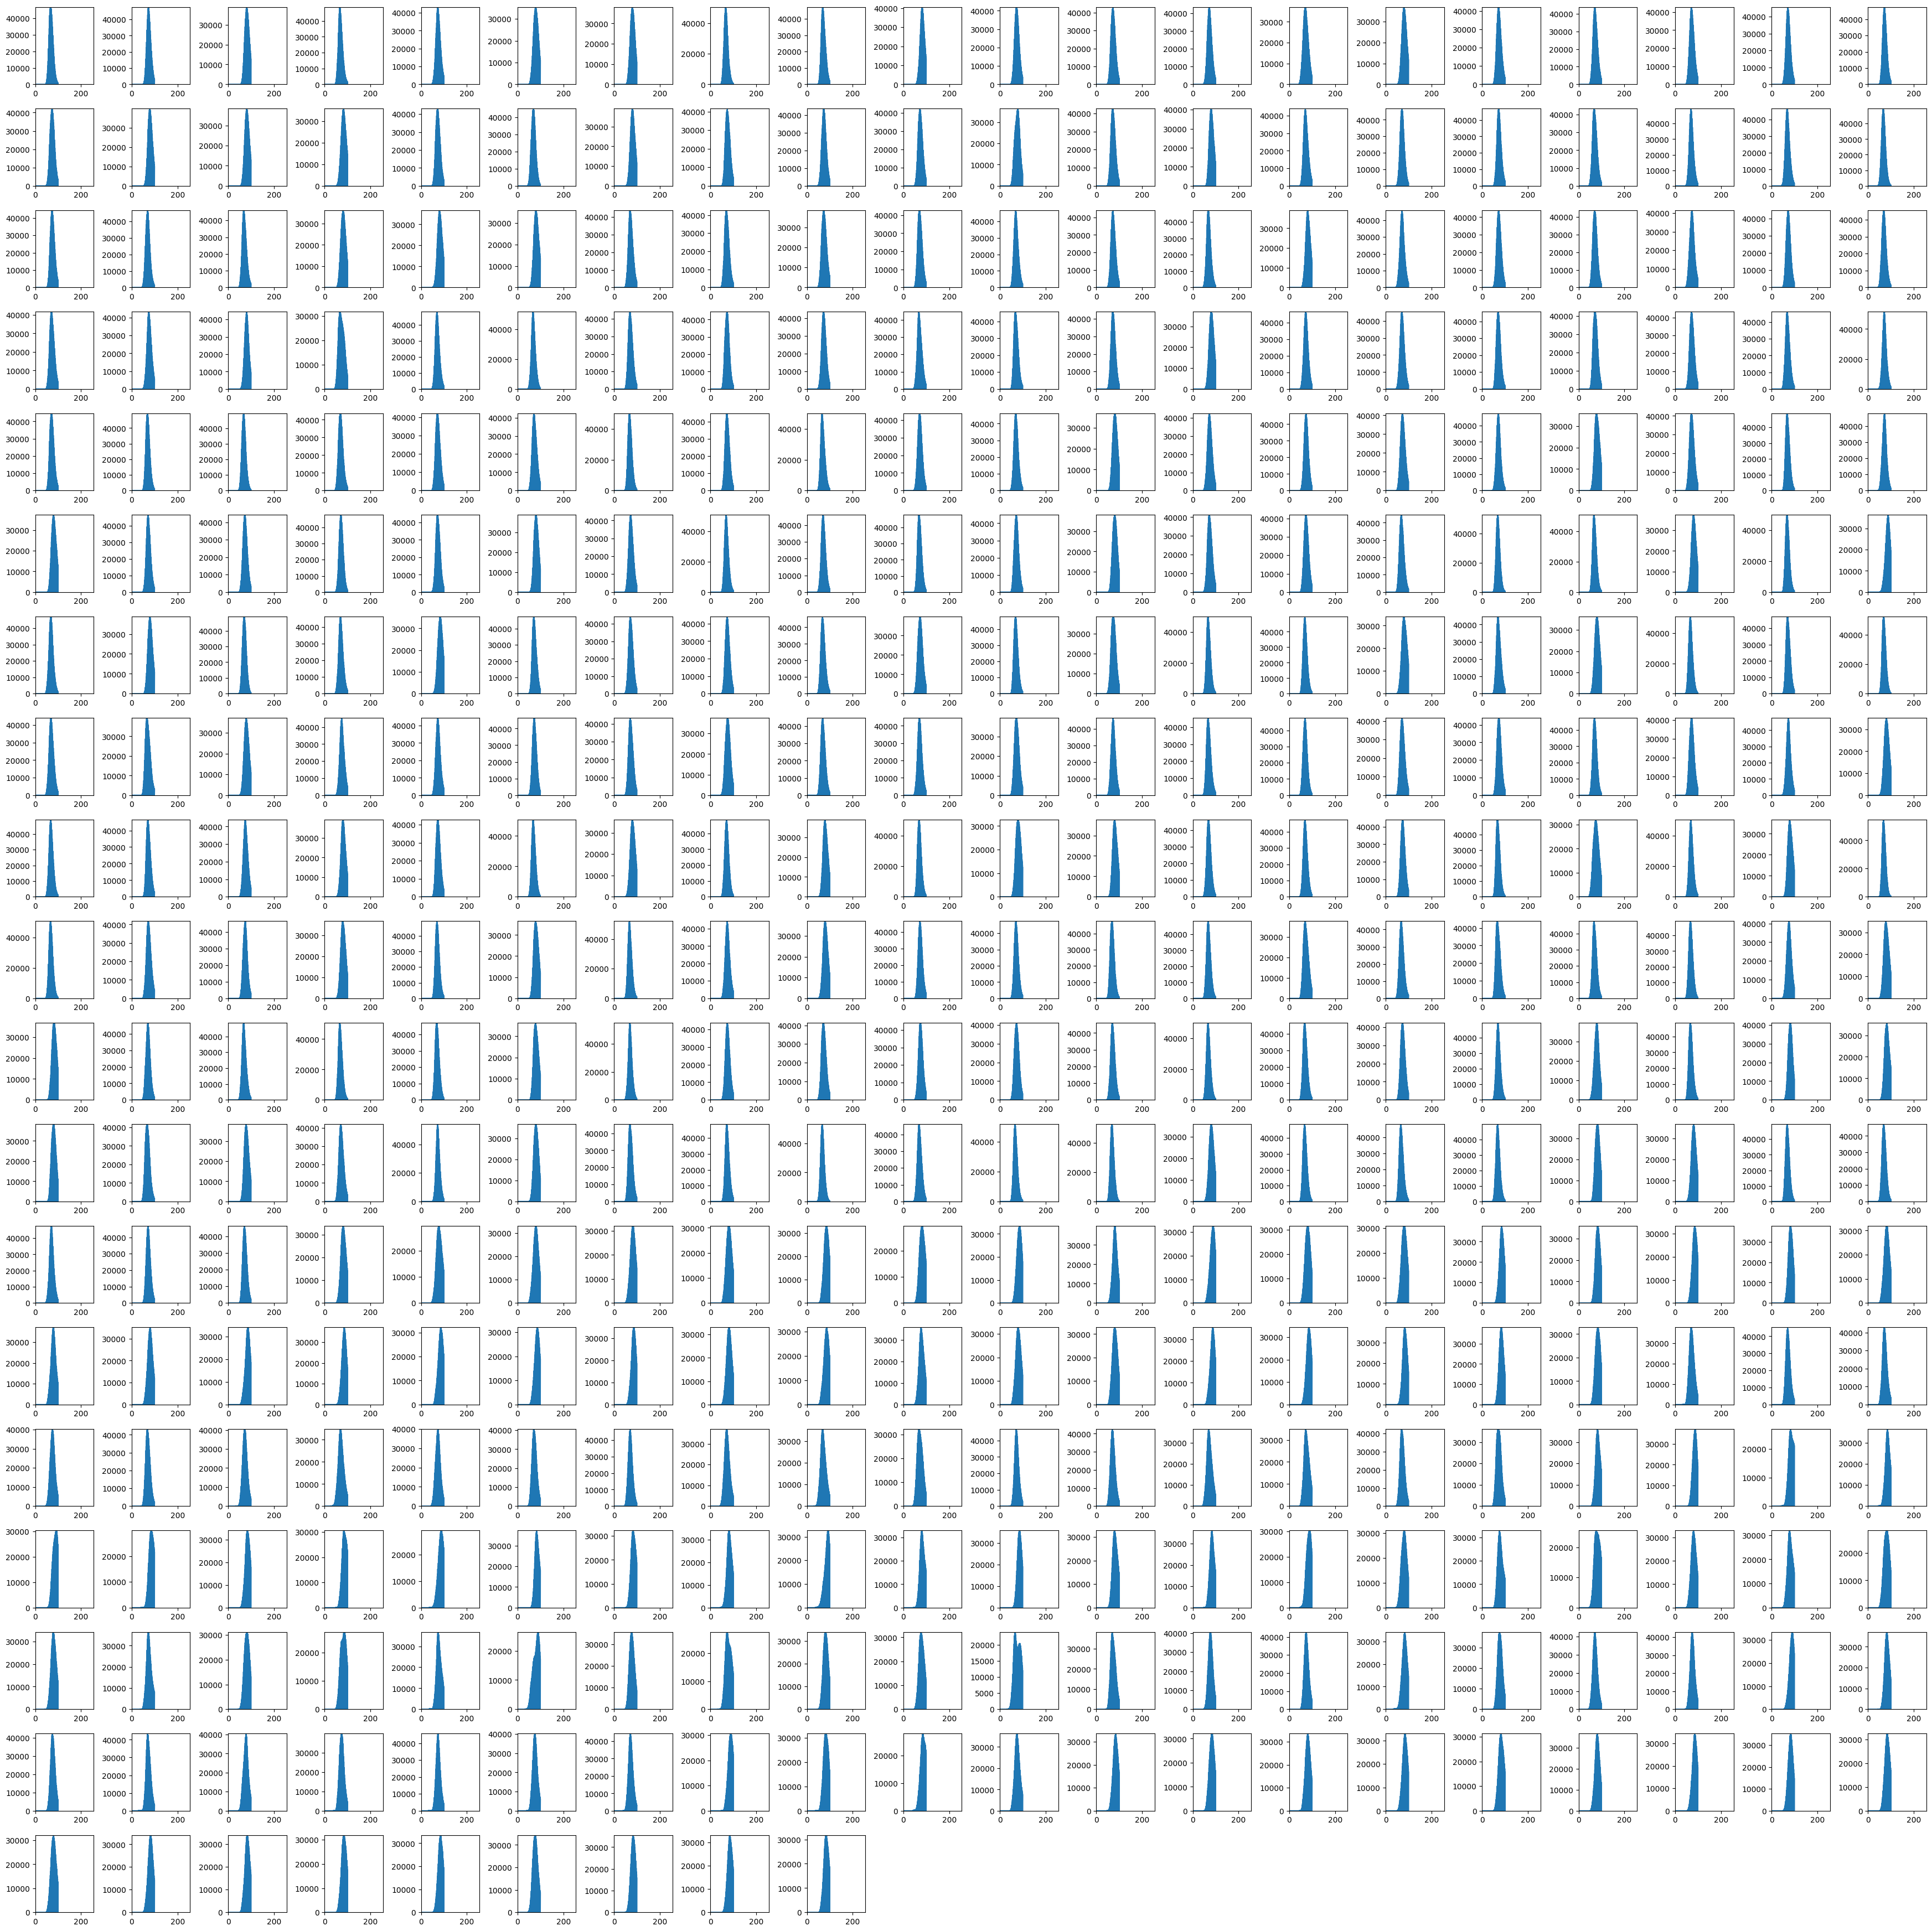

In [9]:
#images_pth = df['guide_paths'][df['iqr_scaled'] > 0.8]
images_pth=exppath_guide['train']+exppath_guide['test']
#markers_ = list(df['anocolor'][df['iqr_scaled'] > 0.9])

num_images = len(images_pth)
num_cols = math.ceil(math.sqrt(num_images))
num_rows = math.ceil(num_images / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 35))
axes = axes.flatten()

for i, path in enumerate(images_pth):
    image = Image.open(path).convert('L')  # Convert image to grayscale
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 100))
    
    axes[i].plot(bin_edges[0:-1], histogram)
    #axes[i].set_title(f"{markers_[i]}")
    axes[i].set_xlim([0, 255])
    axes[i].set_ylim([0, max(histogram)])
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# CONTAMINATED

In [10]:
filepaths_cont=[f'/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-{category}',
                f'/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-{category}',
                f'/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-{category}',
                f'/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-{category}',
                f'/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-{category}']

# TODO add contam scores to the set 


for i,path in enumerate(filepaths_cont):
    
    print(path)
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
        
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
        
    with open(path + "/all_trainscores_clean.pkl", "rb") as file:
        trainscores_clean = pickle.load(file).tolist()
    
    with open(path + "/all_testscores_clean.pkl", "rb") as file:
        testscores_clean = pickle.load(file).tolist()
        
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    
    
    # clean test
    testdf={}
    for k,v in zip(exppath['test'],testscores_clean):
        testdf[k]=v
    sorted_testscores_clean=[]
    for path in exppath_guide['test']:
        if path in testdf.keys():
            sorted_testscores_clean.append(testdf[path])
        else:
            sorted_testscores_clean.append(-1)
            
    # clean train
    sorted_train_clean_idx=[exppath_guide['train'].index(path) for path in exppath['clean_train']]        
    sorted_trainscores_clean=[trainscores_clean[i] for i in sorted_train_clean_idx]     

    allscores_clean=sorted_trainscores_clean+[-1]*len(exppath_guide_contam_paths)+ sorted_testscores_clean
    df[f'cont_clean_{i}']=allscores_clean
    
    # contam test
    test_contdf={}
    for k,v in zip(exppath['test'],testscores):
        test_contdf[k]=v    
        
    sorted_testscores_cont=[]
    for path in exppath_guide['test']:
        if path in test_contdf.keys():
            sorted_testscores_cont.append(test_contdf[path])
        else:
            sorted_testscores_cont.append(-1)
    # contam train 
    
    train_contdf={}
    for k,v in zip(exppath['train'],trainscores):
        train_contdf[k]=v 
    
    sorted_train_cont=[]
    for path in exppath_guide['train']+exppath_guide_contam_paths:
        if path in train_contdf.keys():
            sorted_train_cont.append(train_contdf[path])
        else:
            sorted_train_cont.append(-1)      
    
    allscores=sorted_train_cont+ sorted_testscores_cont
            
    df[f'cont_{i}']=allscores        
df.info()

/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-leather
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-leather
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-leather
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-leather
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-leather
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   guide_paths     461 non-null    object 
 1   markers         461 non-null    object 
 2   anocolor        461 non-null    object 
 3   anocolor_clean  461 non-null    object 
 4   set             461 non-null    object 
 5   clean_1         461 non-null    float64
 6   clean_2         461 non-null    float64
 7   clean_3         461 non-null    float64
 8   clean_4         461 non-null    flo

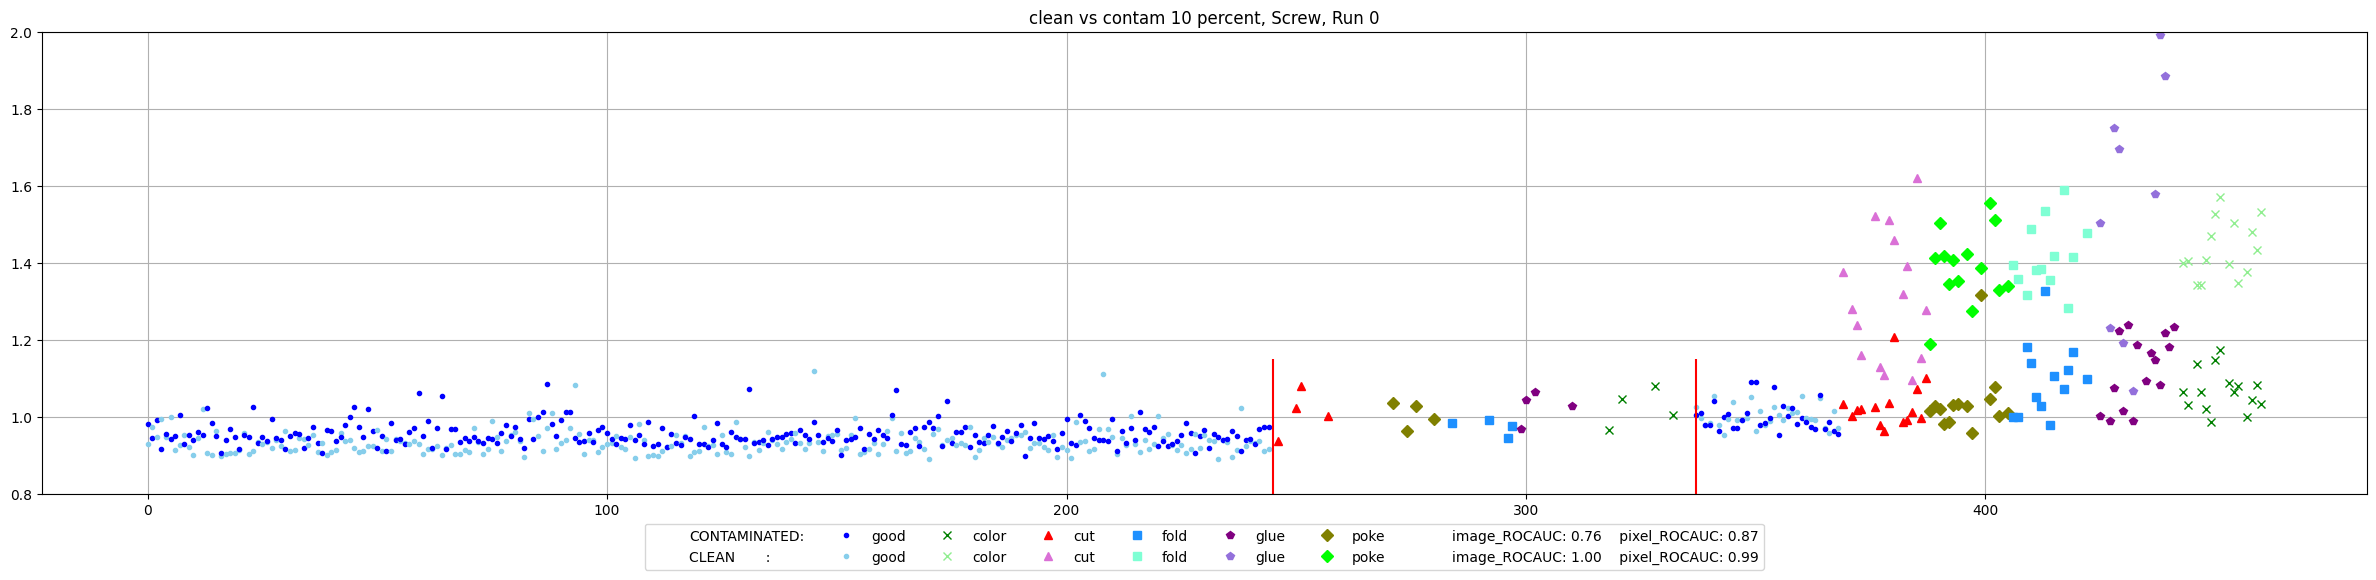

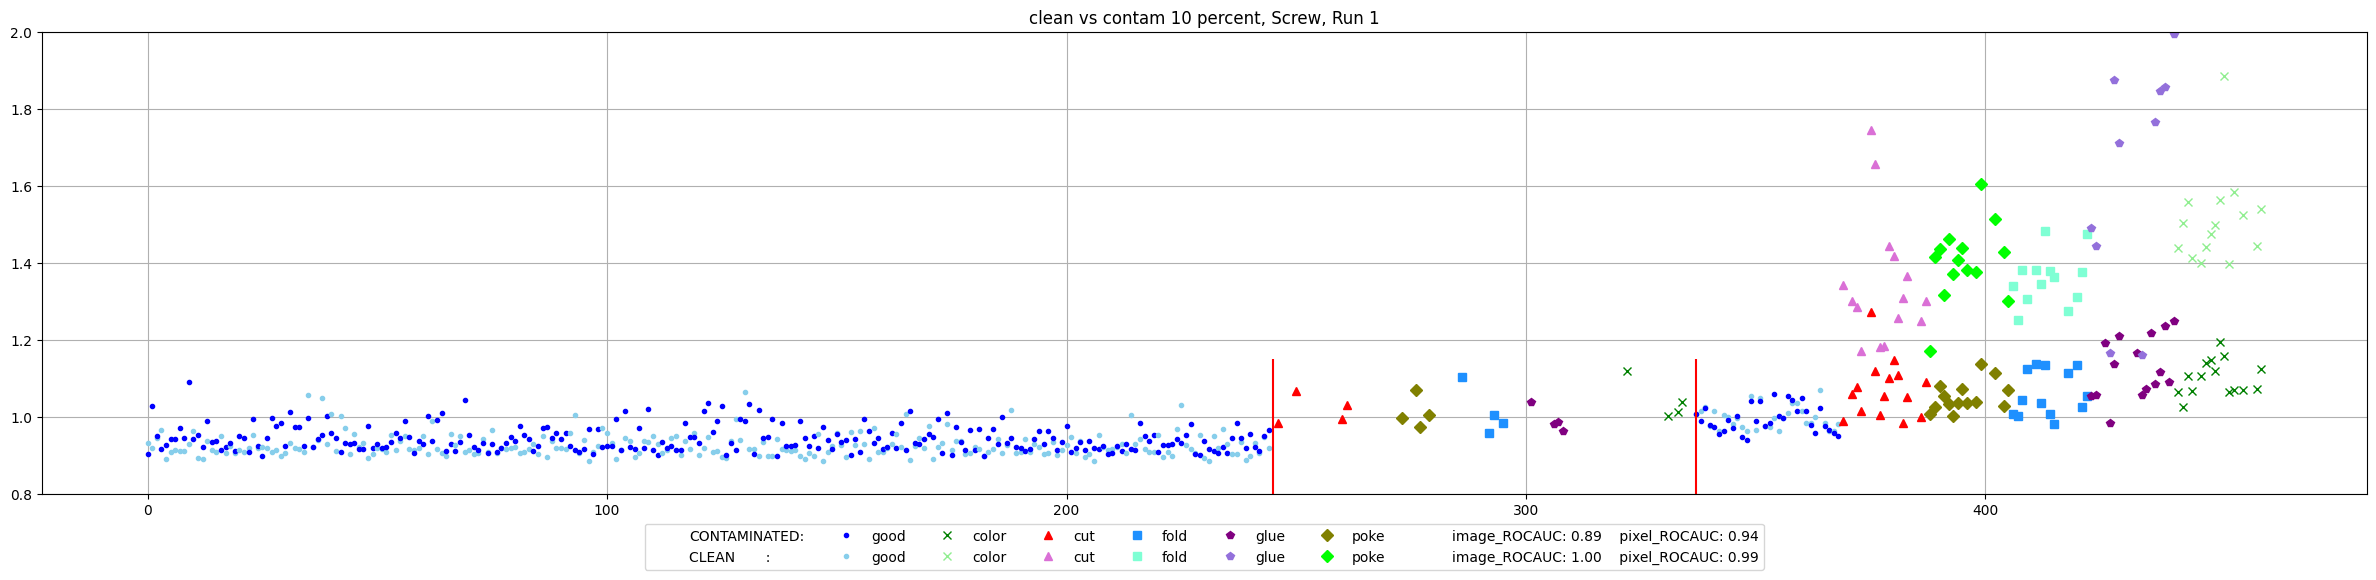

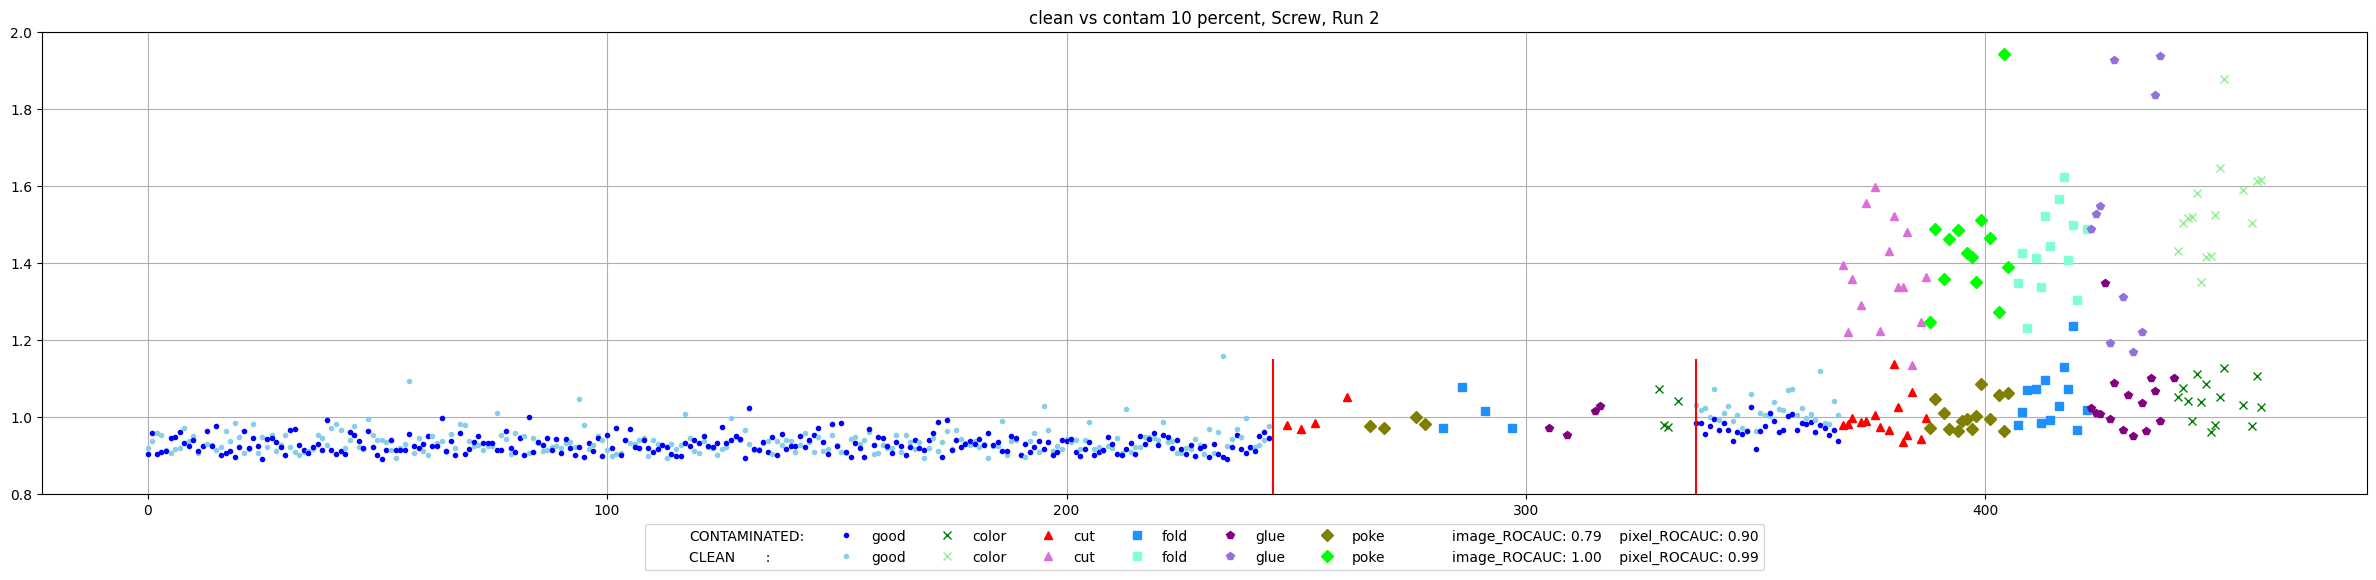

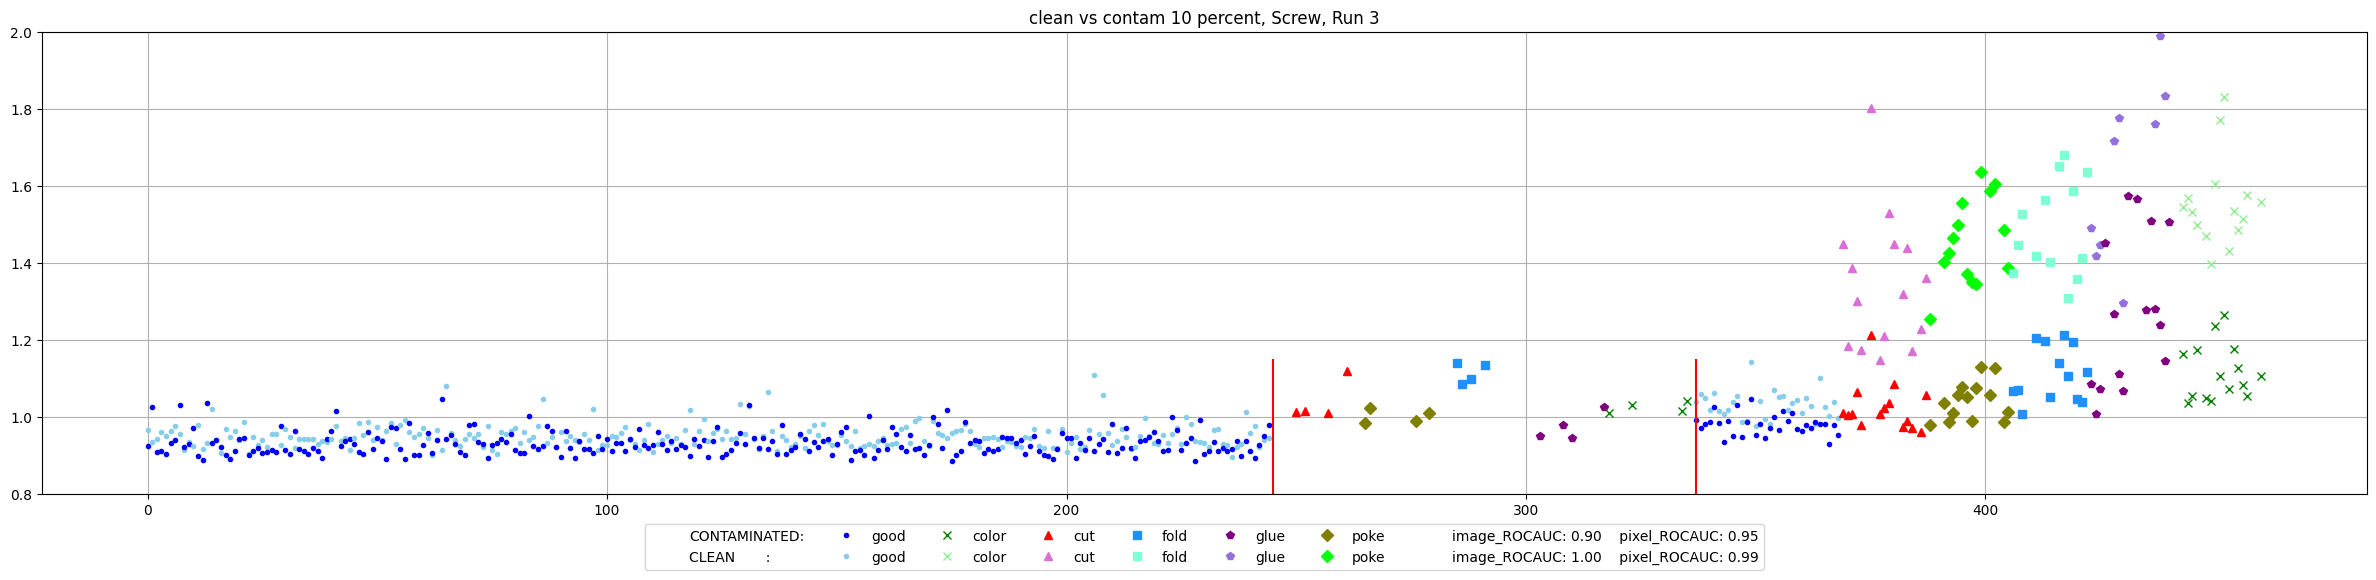

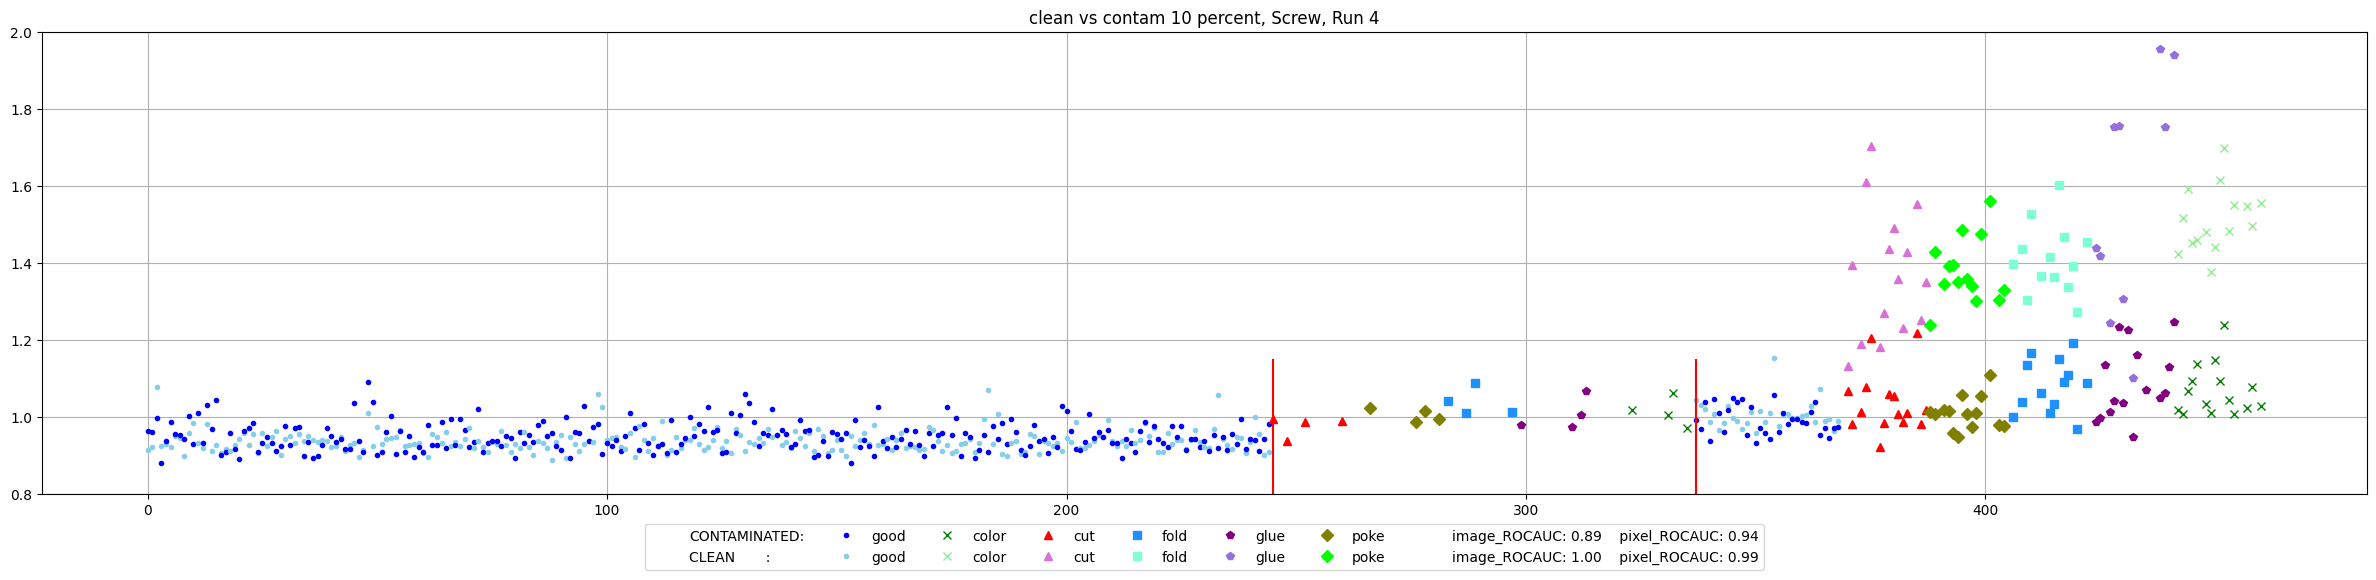

In [11]:
for run, path in enumerate(filepaths_cont): 
    plt.figure(figsize=(30, 6))
    for i in range(len(df)):
        plt.plot(df.index[i], df[f'cont_clean_{run}'][i], marker=df['markers'][i], color=df['anocolor_clean'][i])
        plt.plot(df.index[i], df[f'cont_{run}'][i], marker=df['markers'][i], color=df['anocolor'][i])
    plt.ylim(0.8, 2)
    plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
    plt.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
    plt.grid(True)
    plt.title(f'clean vs contam 10 percent, Screw, Run {run}')
    
    metrics = last_rows_metric([path+'/args.log', path+'/args_cleaned.log'])
    # Create custom legend
    legend_elements = []
    
    legend_elements.append(plt.Line2D([0], [0], color='white', label="CONTAMINATED:", linestyle='None'))
    legend_elements.append(plt.Line2D([0], [0], color='white', label="CLEAN       :", linestyle='None'))
    
    for label, marker in anotype_marker.items():
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color=anocolor[label], label=f'{label}', linestyle='None'))
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color=anocolor_clean[label], label=f'{label}', linestyle='None'))
        

    metrics_text = f"image_ROCAUC: {metrics['image_AUC'][0]:.2f}    pixel_ROCAUC: {metrics['pixel_AUC'][0]:.2f}"
    legend_elements.append(plt.Line2D([0], [0], color='white', label=metrics_text, linestyle='None'))
    
    metrics_text = f"image_ROCAUC: {metrics['image_AUC'][1]:.2f}    pixel_ROCAUC: {metrics['pixel_AUC'][1]:.2f}"
    legend_elements.append(plt.Line2D([0], [0], color='white', label=metrics_text, linestyle='None'))

    
    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=8)

    plt.show()